In [ ]:
# Calculate and plot spectral angle between two datasets
# Here CESM and reanalysis that have alreayd had the monthly time series extracted and saved as a timeseries in a .txt file


In [ ]:
# HydroErr package has additional error metrics that may be useful for evaluating timing, rather than the focus on magnitude 
# https://hydroerr.readthedocs.io/en/latest/installation.html
# see also Jackson et al Introductory overview: Error metrics for hydrologic modelling – A review of common practices and an open source library to facilitate use and adoption

In [1]:
import HydroErr as he
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import seaborn as sns
from glob import glob
import os
import re
from datetime import datetime

In [2]:
# Specify variable names, used in directory names and plotting
chosen_var_CESM = 'QSNOMELT'
chosen_var_reanalysis = 'smlt'
var_for_plotting = 'Snowmelt'

In [3]:
# specify the directories that the datasets to be compared are saved in.
dir= f'/Volumes/MCO_SSD/data/subbasin_data/CESM/{chosen_var_CESM}/grouped_subbasins/east_west/*.txt'
dir2 = f'/Volumes/MCO_SSD/data/subbasin_data/CESM/{chosen_var_CESM}/*.txt'
dir5 = f'/Volumes/MCO_SSD/data/subbasin_data/CESM/{chosen_var_CESM}/grouped_subbasins/entirebasin/*.txt'

dir3 = f'/Volumes/MCO_SSD/data/subbasin_data/ERA5/{chosen_var_reanalysis}/CESM_grid/grouped_subbasins/east_west/*.txt'
dir4 = f'/Volumes/MCO_SSD/data/subbasin_data/ERA5/{chosen_var_reanalysis}/CESM_grid/*.txt'
dir6 = f'/Volumes/MCO_SSD/data/subbasin_data/ERA5/{chosen_var_reanalysis}/CESM_grid/grouped_subbasins/entirebasin/*.txt'


In [4]:
# get list of all files for the two categories of datasets. save each of these as a list to be used in setting up dfs
dir_list = glob(dir, recursive=True)
dir_list2 = glob(dir2, recursive=True)
dir_list3 = glob(dir3, recursive=True)
dir_list4 = glob(dir4, recursive=True)
dir_list5 = glob(dir5, recursive=True)
dir_list6 = glob(dir6, recursive=True)

In [5]:
#Basin names
# keep in this order, and add full basin at the end, because it determines the order of the plotting for the heatmap (based on index number here)

#subbasin_list= ['Arkansas.White.Red.Region','Lower.Mississippi.Region', 'Missouri.Region','Ohio.Region','Tennessee.Region','Upper.Mississippi.Region','Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region', 'Entire.Mississippi.Region'] # Entire.Mississippi.Region
#subbasin_list= ['Arkansas.White.Red.Region','Lower.Mississippi.Region', 'Missouri.Region','Ohio.Region','Tennessee.Region','Upper.Mississippi.Region']
subbasin_list= ['Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region', 'Entire.Mississippi.Region']

In [6]:
#Check files

final_filtered_dir_list = []
print(final_filtered_dir_list)
for basin in subbasin_list:
    print(basin)
    filtered_dir_list = [x for x in dir_list if basin in x] 
    #print(filtered_dir_list)
    filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    #print(filtered_dir_list_2)
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    #print(filtered_dir_list_3)
    filtered_dir_list_4 = [w for w in dir_list4 if basin in w]
    filtered_dir_list_5 = [u for u in dir_list5 if basin in u]
    filtered_dir_list_6 = [v for v in dir_list6 if basin in v]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_2 + filtered_dir_list_4 + filtered_dir_list_5 + filtered_dir_list_6

    final_filtered_dir_list = final_filtered_dir_list
    print(final_filtered_dir_list)

[]
Eastern.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/QSNOMELT/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_QSNOMELT.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/smlt/CESM_grid/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_ERA5_smlt.txt']
Western.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/QSNOMELT/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_QSNOMELT.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/smlt/CESM_grid/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_ERA5_smlt.txt']
Entire.Mississippi.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/QSNOMELT/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_CESM_QSNOMELT.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/smlt/CESM_grid/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_ERA5

In [7]:
# for basin in subbasin_list:
#     print(basin)
#     print(subbasin_list.index(basin))
    
# # seasons_list = [['Mar','Apr','May'],['Jun','Jul','Aug'],['Sep','Oct','Nov'],['Dec','Jan','Feb'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']] 
# # for season in seasons_list:
# #     print(season)
# #     print(seasons_list.index(season))

In [8]:
# Setup dataframes for calculations and calculate spectral angle

# initialize lists to be populated
basin_list = []
basin_number = []
sa_number = []

df = pd.DataFrame()
df_2 = pd.DataFrame()

i = 0

# loop through basins
for basin in subbasin_list:
    print(basin)
    basin_num = subbasin_list.index(basin)

    # compile directory lists to access datasets
    filtered_dir_list = [x for x in dir_list if basin in x] 
    filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    filtered_dir_list_4 = [w for w in dir_list4 if basin in w]
    filtered_dir_list_5 = [u for u in dir_list5 if basin in u]
    filtered_dir_list_6 = [v for v in dir_list6 if basin in v]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_2 + filtered_dir_list_4 + filtered_dir_list_5 + filtered_dir_list_6

    # setup basins names and directory paths
    basin_name = basin
    directory1 = final_filtered_dir_list[i]
    directory2 = final_filtered_dir_list[i+1]
    name1 = os.path.basename(directory1)
    name2 = os.path.basename(directory2)
    print(name1)
    print(name2)
    
    # setup dataframe1  ## this could be updated to add any other datasets that will be plotted on the same y axis
    df = pd.read_csv(directory1, sep=" ", header = 0)
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['DATE2'] = df['DATE'] # fix this. on the plane and don't remember the option to keep a column while setting it as index
    df['month_txt'] = df['DATE'].dt.strftime("%b")
    df = df[(df['DATE'] >='1950-01-01') & (df['DATE'] <='2005-01-01')]
    df = df.set_index('DATE')
    #df['value'] = df['value']*(2629800) # CESM units are mm/s, so multiply by seconds in a month to convert to mm. Since time step is monthly, this converts to common time step of mm/month.

      
    # setup dataframe2
    df_2 = pd.read_csv(directory2, sep=" ", header = 0)
    df_2['DATE'] = pd.to_datetime(df_2['DATE'])
    df_2['DATE2'] = df_2['DATE']
    df_2['month_txt'] = df_2['DATE'].dt.strftime("%b")
    df_2 = df_2[(df_2['DATE'] >='1950-01-01') & (df_2['DATE'] <='2005-01-01')]
    df_2 = df_2.set_index('DATE')
    #df_2['value'] = df_2['value']*(1000) # ERA5 units are m, so multiply by 1000 to convert to mm. Since time step is monthly, this converts to common time step of mm/month.

    
    #spectral angle
    #Range: -π/2 ≤ SA < π/2, closer to 0 is better.
    #Notes: The spectral angle metric measures the angle between the two vectors in hyperspace. It indicates how well the shape of the two series match – not magnitude.
    sa = he.sa(df['value'],df_2['value'])
    
    # append values to lists for plotting
    basin_list.append(basin)
    basin_number.append(basin_num)
    sa_number.append(sa)
    
    
df_skill = pd.DataFrame({'Basin': basin_list, 
                         'Basin_Number':basin_number, 
                         'SA':sa_number}) #'Year': year_list, 'Spearman_Sig': pspear_list, 'Pearson_Sig': ppear_list, 'PBIAS': pbias_list, 
print(df_skill)        
    

Eastern.Mississippi.Basin.Region
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_QSNOMELT.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_ERA5_smlt.txt
Western.Mississippi.Basin.Region
subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_QSNOMELT.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_ERA5_smlt.txt
Entire.Mississippi.Region
subbasin_monthly_avg_Entire.Mississippi.Region_CESM_QSNOMELT.txt
subbasin_monthly_avg_Entire.Mississippi.Region_ERA5_smlt.txt
                              Basin  Basin_Number        SA
0  Eastern.Mississippi.Basin.Region             0  0.733034
1  Western.Mississippi.Basin.Region             1  0.483529
2         Entire.Mississippi.Region             2  0.474055


In [9]:
# Append variable name for plotting

sub_lst = ['Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region', 'Entire.Mississippi.Region']
df_skill_filtered = df_skill[df_skill['Basin'].str.contains('|'.join(sub_lst), na=False)]
df_skill_filtered['variable'] = var_for_plotting
df_skill_filtered


,Basin,Basin_Number,SA,variable
0,Eastern.Mississippi.Basin.Region,0,0.733034,Snowmelt
1,Western.Mississippi.Basin.Region,1,0.483529,Snowmelt
2,Entire.Mississippi.Region,2,0.474055,Snowmelt


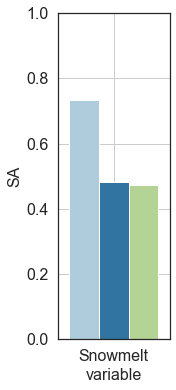

In [10]:
sns.set(style='white', rc={'axes.labelsize': 16, 'axes.titlesize': 18, 'font.size': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16})

plt.figure(figsize=(2, 6))
chart = sns.barplot(x = 'variable', y = 'SA', data = df_skill_filtered, palette = "Paired", hue = "Basin", edgecolor=None)
#chart.set(title="Spectral Angle by Basin")
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylim(0,1)
#plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend().remove()

# Show the plot
plt.grid(True)
plt.savefig(f'/Volumes/MCO_SSD/data/plots/validation_paper/SA_{chosen_var_CESM}.png', dpi=300, bbox_inches='tight')
plt.show()